# Clustering Analysis

## Three different clustering types

1. prototype-based clustering: each cluster is represented by a prototype(k-means)    
2. hierarchical-based clustering   
3. density-based clustering (DBSCAN)
4. graph-based clustering(*)

## 1. prototype-based clustering

## 1.1 K-Means

K-means:  A technique that allows us to find groups of similar objects.  
advantage: computationally efficient  
disadvantage : specify the #k  
Application:  
1. grouping of documents,music,and movies by different topics    
2. recommendation engines  

  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

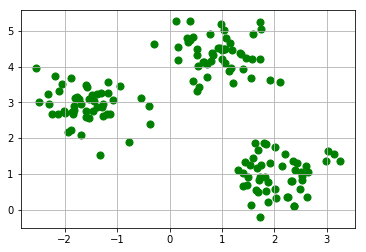

In [8]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 150,
                n_features = 2,
                centers = 3,
                cluster_std = 0.5,
                 shuffle = True,
                 random_state = 0
                )
plt.scatter(X[:,0],X[:,1],c = 'green',marker = 'o',s = 50)
plt.grid()

In [11]:
# cluster
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,init = 'random',n_init = 10, max_iter = 300,tol = 1e-04,random_state = 0)
# n_clusters : number of K
# n_init: run the algorithms 10 times
# max_iter : max number of iteration
# tol: tolerance of declare convergence

In [12]:
y_km = km.fit_predict(X)

In [13]:
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

## 1.2 K-means++

Place the initial centroids far away from each other 

set the init to "k-means++" instead of "random"

problem of K-means:
1. slow convergence if the initial centroids are chosen poorly (use K-means++)
2. one or more clusters can be empty

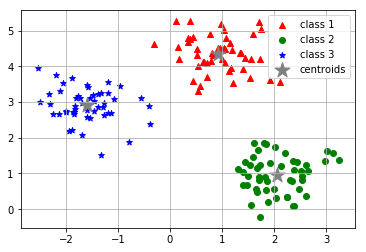

In [22]:
plt.scatter(X[y_km ==0,0],X[y_km == 0,1],color = 'red',marker = '^',label = "class 1")
plt.scatter(X[y_km ==1,0],X[y_km == 1,1],color = 'green',marker = 'o',label = "class 2")
plt.scatter(X[y_km ==2,0],X[y_km == 2,1],color = 'blue',marker = '*',label = "class 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s = 250,marker="*",c = 'gray',label = "centroids")
plt.legend()
plt.grid()

In [24]:
## SSE
km.inertia_

72.47601670996698

## 1.3 Hard vs Soft Clustering

Hard: each sample is assigned to exactly one cluster  
soft: replace binary with probability  
FCM(fuzzy C-means) simiar with k-means

## 1.4 Choose number of K

### 1.4.1 Using the elbow method

In [25]:
distortion = []
for i in range(1,11):
    km = KMeans(n_clusters = i,init = 'random',n_init = 10, max_iter = 300,tol = 1e-04,random_state = 0)
    km.fit(X)
    distortion.append(km.inertia_)

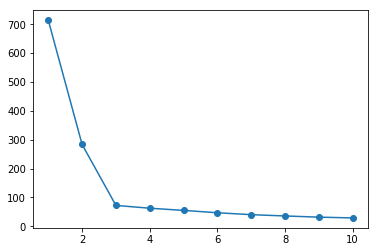

In [29]:
plt.plot(range(1,11),distortion,marker = 'o')
# K = 3 is a good choise

### 1.4.2 Silhouette plots

In [40]:
km = KMeans(n_clusters = 2,init = 'k-means++',n_init = 10, max_iter = 300,tol = 1e-04,random_state = 0)
y_km = km.fit_predict(X)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_label = np.unique(y_km)
n_clusters = cluster_label.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric = 'euclidean')

([<matplotlib.axis.YTick at 0x113d0c5c0>,
 <a list of 2 Text yticklabel objects>)

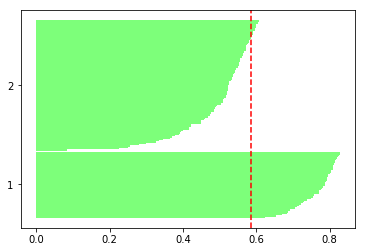

In [41]:
y_ax_lower,y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_label):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(1/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color = 'red',linestyle = "--")
plt.yticks(yticks,cluster_label +1)

([<matplotlib.axis.YTick at 0x1143dd748>,
 <a list of 3 Text yticklabel objects>)

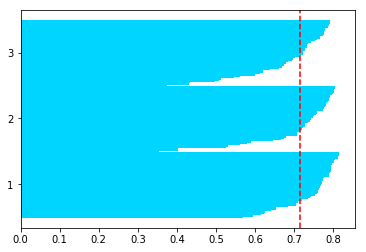

In [42]:
km = KMeans(n_clusters = 3,init = 'k-means++',n_init = 10, max_iter = 300,tol = 1e-04,random_state = 0)
y_km = km.fit_predict(X)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_label = np.unique(y_km)
n_clusters = cluster_label.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric = 'euclidean')
y_ax_lower,y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_label):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(1/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color = 'red',linestyle = "--")
plt.yticks(yticks,cluster_label +1)

## 2. Organizing clusters as a hierarchical tree

Hierarchical clustering Advantage:
1. allows plot dendrograms
2. dont need to specify number of clusters

agglomerative clustering: start with each sample as individual cluster and merge the closest pairs until only one cluster remains

single linkage: most similar members   
complete linkage: most dissimilar members

In [43]:
import pandas as pd
import numpy as np
np.random.seed(123)

In [47]:
variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X,columns = variables,index = labels)

In [54]:
df

,X,Y,Z
ID_0,2.504554,4.830343,9.855598
ID_1,5.194851,6.128945,1.206287
ID_2,8.263408,6.030601,5.450680
ID_3,3.427638,3.041208,4.170222
ID_4,6.813008,8.754568,5.104223


In [49]:
from scipy.spatial.distance import pdist,squareform
row_dist = pd.DataFrame(squareform(pdist(df,metric = 'euclidean')),columns = labels,index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,9.150664,7.349036,6.031301,7.519168
ID_1,9.150664,0.000000,5.238376,4.630559,4.970537
ID_2,7.349036,5.238376,0.000000,5.827582,3.105429
ID_3,6.031301,4.630559,5.827582,0.000000,6.706383
ID_4,7.519168,4.970537,3.105429,6.706383,0.000000


In [55]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df,metric="euclidean"),method = 'complete')

In [56]:
pd.DataFrame(row_clusters,
             columns = ['row label 1','row label 2','distance','#iterms'],
             index = ['cluster1','cluster2','cluster3','cluster4'])

,row label 1,row label 2,distance,#iterms
cluster1,2.0,4.0,3.105429,2.0
cluster2,1.0,3.0,4.630559,2.0
cluster3,5.0,6.0,6.706383,4.0
cluster4,0.0,7.0,9.150664,5.0


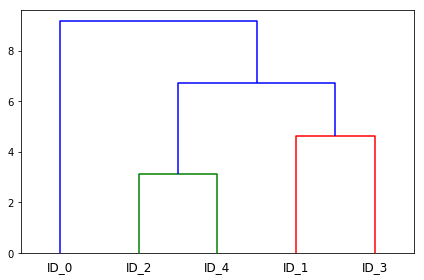

In [57]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters,labels = labels)
plt.tight_layout()


[Text(0,0,''),
 Text(0,0,'ID_3'),
 Text(0,0,'ID_1'),
 Text(0,0,'ID_4'),
 Text(0,0,'ID_2'),
 Text(0,0,'ID_0')]

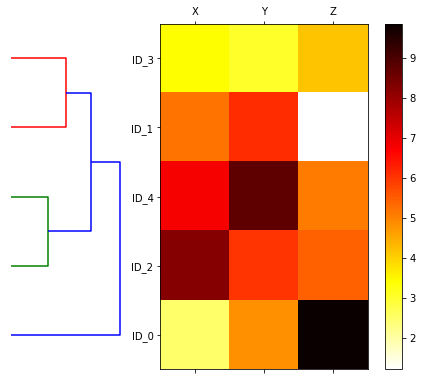

In [63]:
fig = plt.figure(figsize= (8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters,orientation="right")

df_rowclust = df.ix[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust,interpolation = 'nearest',cmap ='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))

## 2.2 Agglomerative clustering via sklearn

In [66]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,affinity = 'euclidean',linkage='complete')
labels = ac.fit_predict(X)
print("labels :{}".format(labels))

labels :[1 0 0 0 0]


In [67]:
X

array([[2.50455365, 4.83034264, 9.85559786],
       [5.19485119, 6.12894526, 1.20628666],
       [8.26340801, 6.03060128, 5.45068006],
       [3.42763834, 3.04120789, 4.17022211],
       [6.81300766, 8.75456842, 5.10422337]])

## 3. Locationg regions of high density via DBSCAN

DBSCAN: Density-based Spatial Clustering of Applications with Noise

Advantage: 
1. don't assume that the clusters have a spherical shape as in k-means
2. capables of removing noise points  

Disadvantage:  
1. curse of dimensionality 

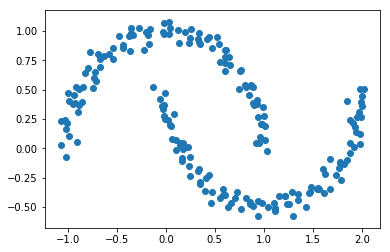

In [68]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 200,noise = 0.05,random_state = 0)
plt.scatter(X[:,0],X[:,1])

In [70]:
# k-means vs complete linkage clustering vs DBSCAN


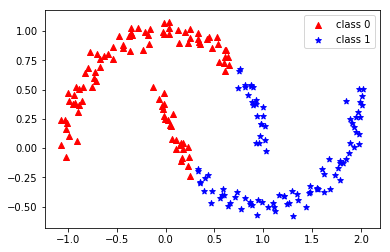

In [73]:
# k-means
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2,init = 'random',n_init = 10, max_iter = 300,tol = 1e-04,random_state = 0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km == 0,0],X[y_km ==0,1],color = 'red',marker = "^",label = "class 0")
plt.scatter(X[y_km == 1,0],X[y_km ==1,1],color = 'blue',marker = "*",label = "class 1")
plt.legend()

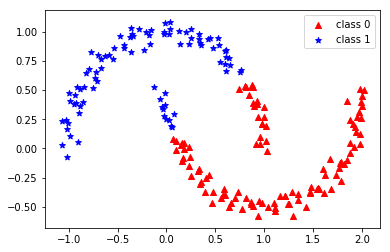

In [74]:
# complete linkage
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,affinity = 'euclidean',linkage='complete')
y_ac = ac.fit_predict(X)
plt.scatter(X[y_ac == 0,0],X[y_ac ==0,1],color = 'red',marker = "^",label = "class 0")
plt.scatter(X[y_ac == 1,0],X[y_ac ==1,1],color = 'blue',marker = "*",label = "class 1")
plt.legend()

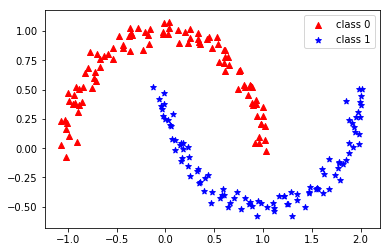

In [75]:
# DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2,min_samples = 5,metric = "euclidean")
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0,0],X[y_db ==0,1],color = 'red',marker = "^",label = "class 0")
plt.scatter(X[y_db == 1,0],X[y_db ==1,1],color = 'blue',marker = "*",label = "class 1")
plt.legend()

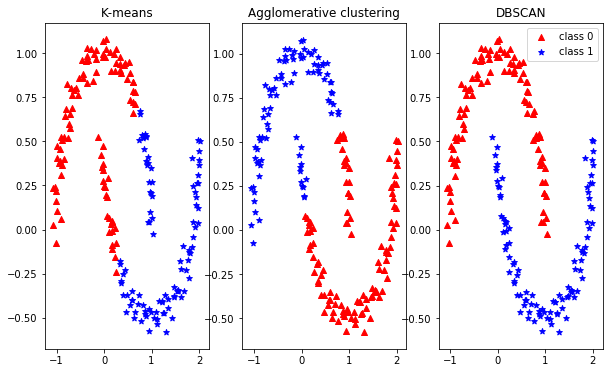

In [89]:
f , (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (10,6))
ax1.scatter(X[y_km == 0,0],X[y_km ==0,1],color = 'red',marker = "^",label = "class 0")
ax1.scatter(X[y_km == 1,0],X[y_km ==1,1],color = 'blue',marker = "*",label = "class 1")
ax1.set_title("K-means")
ax2.scatter(X[y_ac == 0,0],X[y_ac ==0,1],color = 'red',marker = "^",label = "class 0")
ax2.scatter(X[y_ac == 1,0],X[y_ac ==1,1],color = 'blue',marker = "*",label = "class 1")
ax2.set_title("Agglomerative clustering")
ax3.scatter(X[y_db == 0,0],X[y_db ==0,1],color = 'red',marker = "^",label = "class 0")
ax3.scatter(X[y_db == 1,0],X[y_db ==1,1],color = 'blue',marker = "*",label = "class 1")
ax3.set_title("DBSCAN")
plt.legend()

## 4. Summary

k-means: clusters samples ino spherical shapes based on specified number of cluster centroids  
intrinsic performance metrics: elbow method / silhouette analysis  
agglomerative hierarchical clustering: don't need number of K,can visulated  
DBSCAN: groups points based on local densities / handle outliers  

## 5. Reference

K-means++ :  
The Advantage of Careful Seeding (D.Arthur)  
  
FCM:   
Pattern Recognition with Fuzzy Objective Function Algorithms (J.C.Bezdek)  
  
k-mean vs FCM:   
Comparative Analysis of k-means and Fuzzy c-means Algorithms (Soumi Ghosh)  
  
Spectral Clustering:   
A tutorial on Spectral Clustering http://arxiv.org/pdf/0711.0189v1.pdf  
